In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# histogram to show the distribution of yearly salaries (salary_year_avg) for data analyst positions.

# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


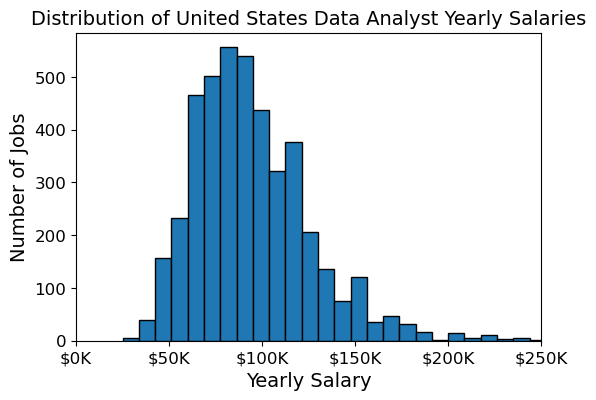

In [25]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , _: f'${int(x/1000)}K'))

plt.gcf().set_size_inches(6, 4)
plt.title('Distribution of United States Data Analyst Yearly Salaries', fontsize= 14)
plt.xlabel('Yearly Salary', fontsize=14)
plt.xticks(fontsize=12) 
plt.ylabel('Number of Jobs', fontsize= 14)
plt.yticks(fontsize=12)  
plt.tight_layout
plt.show()